**RECONHECIMENTO E RECONSTRUÇÃO FACIAL A PARTIR DE SVD: UMA ANÁLISE SOCIAL**
==========================================================

**Autores:**

* *Caio M. Leão Dantas*

* *Gabriel M. Sousa*

* *Izabel de M. Carvalho*

* *Rafael A. S. Santos*

---

## ▶️ ***CONSIDERAÇÕES INICIAIS***

Tal notebook teve como base a adaptação dos princípios adotados nas explicações e algoritmos disponibilizados no GitHub do usuário "**kategimranova**"[1] e no paper encontrado na Springer Nature Link de autoria de **Guoliang Zeng**[2].

## 📖 ***BIBLIOTECAS UTILIZADAS***

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.spatial

## 🎲 ***CARREGAMENTO DE DADOS***

O primeiro passo a ser realizado é **`importar os dados`** que serão utilizados. Nesse caso específico, para análise e teor mais explicativo, serão utilizados os dados obtidos a partir do dataset ***fetch_olivetti_faces*** do Scikit Learn[3] que disponibiliza 400 imagens de 40 faces distintas coletadas na Universidade de Cambridge na década de 1990 em diferentes condições de expressão, iluminação e disposição do rosto.

No dataset, as imagens são armazenadas como **`arrays 2D`** de tamanho 64x64 que podem ter suas dimensões reduzidas para um array unidimensional de tamanho 4096.

In [2]:
dados = fetch_olivetti_faces()
_, h, w = dados.images.shape
X = dados.data
y = dados.target
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size=0.1, stratify=y)

## 📷 ***GALERIA DE IMAGENS***

A partir da análise dos dados importados, podemos plotar a **`galeria completa`** das imagens encontradas no dataset, de forma a ver exatamente as 40 diferentes pessoas fotografadas com 10 fotos cada. Tais pessoas serão as utilizadas para mostrar como que acontece o processo de reconstrução e reconhecimento facial nesse notebook.

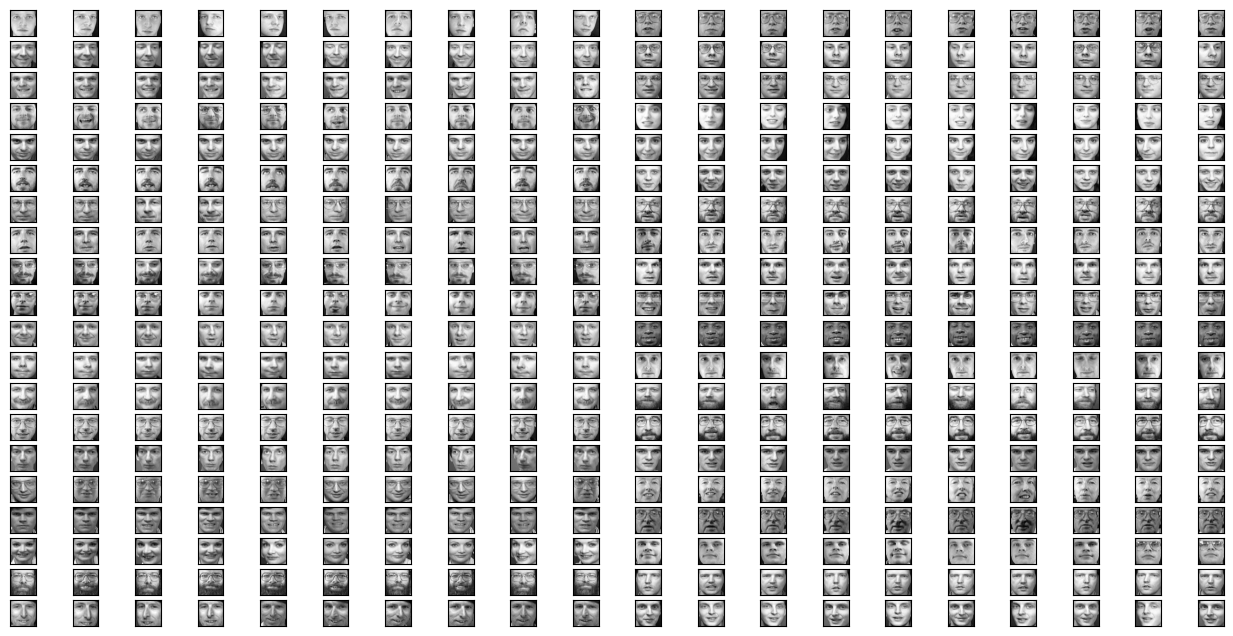

In [3]:
def plot_gallery(images, y, h, w, rows=20, cols=20):
    plt.figure(figsize=(16, 8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, h, w)

## 👤 ***CÁLCULO DA FACE MÉDIA***

Em função de todos os dados/faces dispostos na galeria, podemos fazer o cálculo da **`face média`** entre todos os rostos, de forma a analisar os rostos como matrizes que serão matematicamente calculadas no intuito de achar uma média entre eles. Para tal processo, utilizamos o ***Numpy*** no cálculo da média, biblioteca comumente utilizada nos âmbitos da computação e matemática.

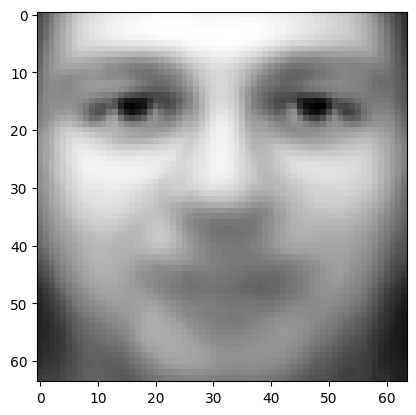

In [4]:
face_media = np.mean(X_treino, axis=0)
plt.figure()
plt.imshow(face_media.reshape((h, w)), cmap=plt.cm.gray)

## 🧮 ***CÁLCULO DA DECOMPOSIÇÃO SVD***

Com a face média já calculada, será feita a ***subtração da face média*** nos dados de treino para que possa ser calculada a **`decomposição SVD`** nesses dados, de modo a *obter uma matriz U* - usada na próxima seção para cálculo da "face vetor" - e *reduzir a dimensionalidade do problema*. 

In [5]:
faces_treino = X_treino - np.tile(face_media, (X_treino.shape[0], 1))
U, Sigma, VT = np.linalg.svd(faces_treino.T, full_matrices=False)

## 🧑🏽***ACHANDO UMA "FACE VETOR"***

Sabendo da teoria do SVD, podemos, portanto, plotar a matriz referente a U, que seria a **`face vetor`** da reestruturação, sendo essa utilizada para comparação posteriormente com os dados de teste e busca da imagem mais aproximada, de modo a realizar o ***reconhecimento facial***.

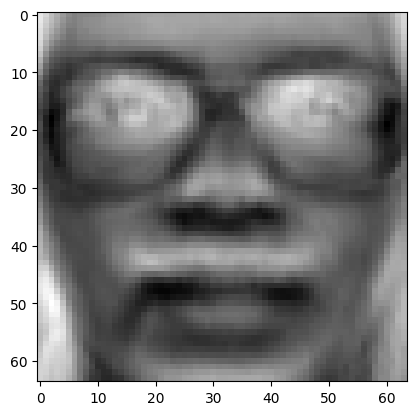

In [6]:
plt.figure()
plt.imshow(U[:, 6].reshape((h, w)), cmap=plt.cm.gray)

In [7]:
f = X_teste[2] - face_media
projecao_teste = U.T @ f
projecao_teste = projecao_teste.reshape(-1, 1)  # Generaliza a dimensão

In [8]:
projecao_treino = U.T @ faces_treino.T

## 📏 ***CÁLCULO DA DISTÂNCIA EUCLIDIANA***

Em sequência, será calculada a distância euclidiana entre os dados para achar a **`face mais próxima`** da analisada. Essa face será exibida abaixo:

In [9]:
norms = scipy.spatial.distance.cdist(projecao_teste.T, projecao_treino.T, 'euclidean')
face_mais_proxima = np.argmin(norms[0])

Text(0.5, 1.0, 'Rosto: 22')

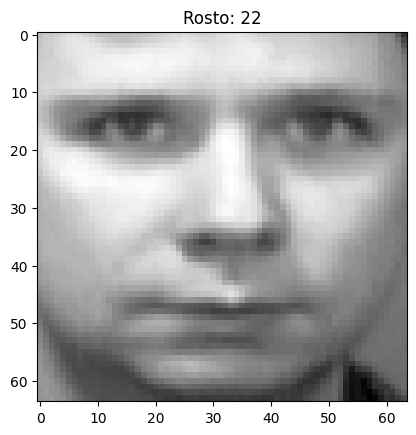

In [10]:
# Exibição da face mais próxima
plt.figure()
plt.imshow(X_treino[face_mais_proxima].reshape((h, w)), cmap=plt.cm.gray)
plt.title(f'Rosto: {Y_treino[face_mais_proxima]}')

## 🏗️ ***RECONSTRUÇÃO DA FACE***

Já sabendo qual a face mais próxima da analisada, podemos fazer um processo de ***reconstrução*** dessa face ***em função da face média*** a partir da alteração do **`número de componentes principais`**, de modo a entender como as faces possuem uma proximidade se o "tamanho" da imagem - e, consequentemente, dos dados - aumentar.

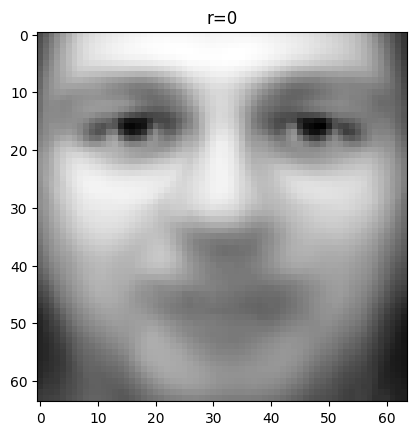

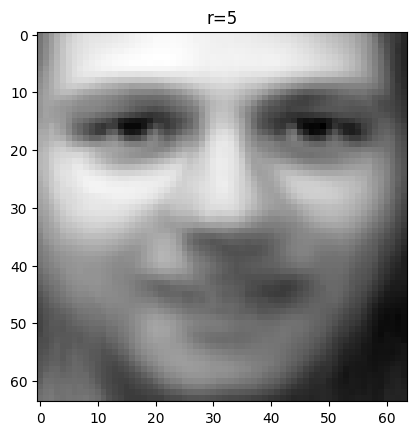

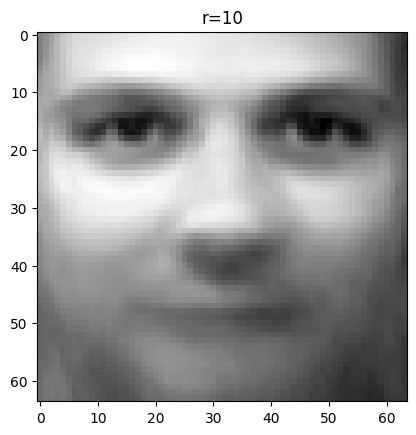

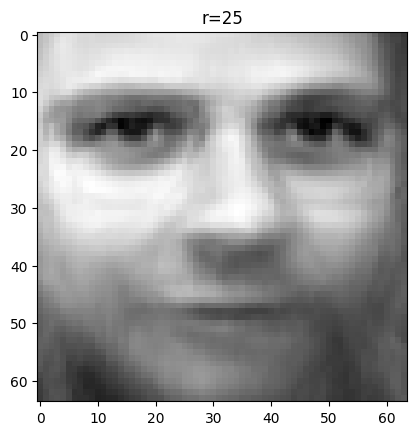

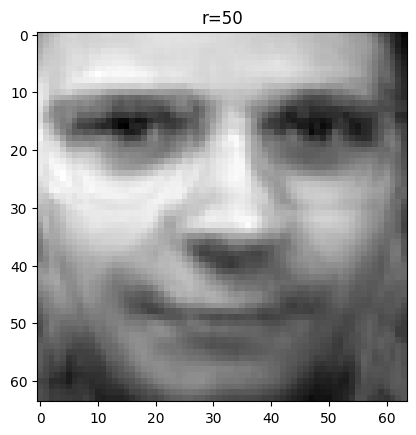

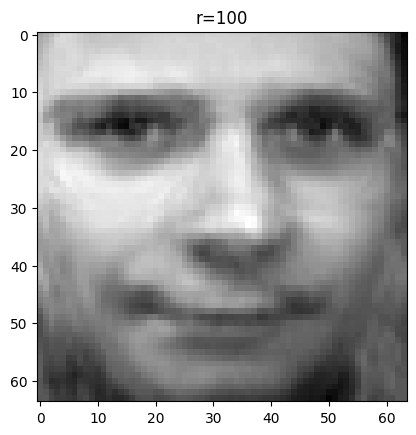

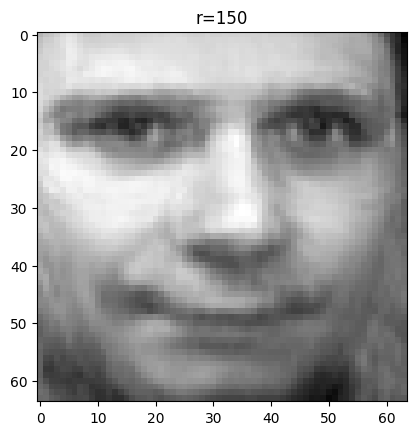

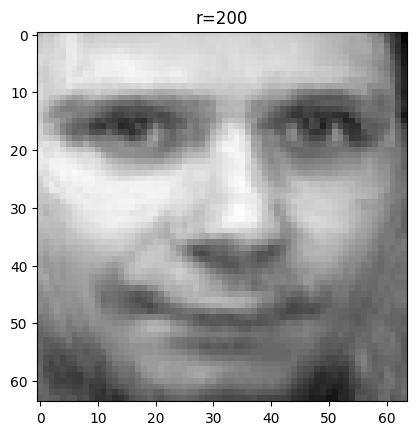

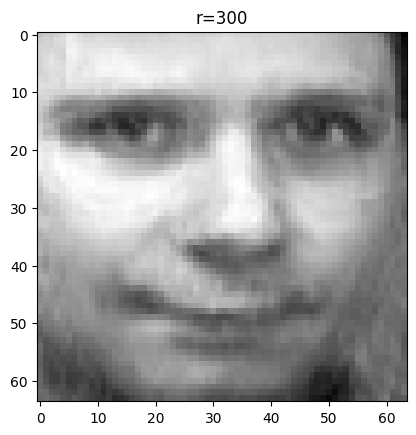

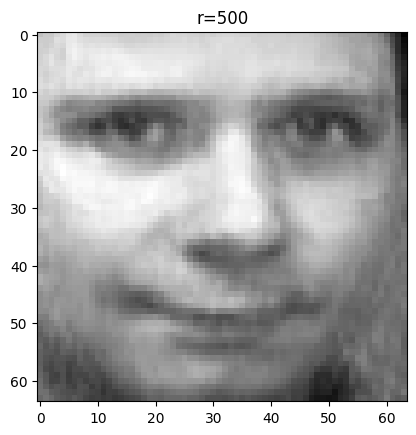

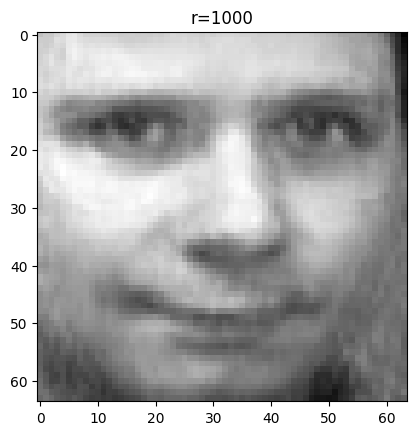

In [11]:
lista_valores = [0,5,10,25,50,100,150,200,300,500,1000]

for valor in lista_valores:
  reconFace = face_media + U[:,:valor] @ U[:,:valor].T @ f
  plt.imshow(reconFace.reshape((h, w)), cmap=plt.cm.gray)
  plt.title('r='+str(valor))
  plt.show()

## 🎯 ***ACURÁCIA DO TESTE***

Com isso, podemos calcular o ***desempenho*** do teste a partir da acurácia, de maneira a tentar entender se o teste foi **`eficiente`** ou tem alguma tendência a **`errar`**.

In [12]:
k = 0
for i in range(1, len(X_teste)):
    f = X_teste[i] - face_media
    projecao_teste = U.T @ f
    projecao_teste = projecao_teste.reshape(-1, 1)
    norms = scipy.spatial.distance.cdist(projecao_teste.T, projecao_treino.T, 'euclidean')
    face_mais_proxima = np.argmin(norms[0])
    if Y_teste[i] == Y_treino[face_mais_proxima]:
        k += 1

accuracy = k / len(X_teste)
print(f'O reconhecimento tem acurácia de: {(accuracy*100):.2f}%')

O reconhecimento tem acurácia de: 97.50%


## 📚 ***REFERÊNCIAS***

**[1]** kategimranova. **Face Recognition and Reconstruction using SVD**. GitHub. Disponível em: [https://github.com/kategimranova/Face-Recognition-and-Reconstruction-using-SVD/tree/main](https://github.com/kategimranova/Face-Recognition-and-Reconstruction-using-SVD/tree/main)

**[2]** ZENG, Guoliang. **Facial Recognition with Singular Value Decomposition**. Disponível em: [https://link.springer.com/chapter/10.1007/978-1-4020-6264-3_26](https://link.springer.com/chapter/10.1007/978-1-4020-6264-3_26) 

**[3]** Scikit Learn. **fetch_olivetti_faces**. Disponível em: [https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_olivetti_faces.html](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)